# **REGRESSÃO LINEAR**

**Atributos previsores**

Cost ctr = centro de custo (setor da linha de produção)

Posting date = data de produção

QTY = quantidade de peças produzidas

**Variável alvo**

Employees QTY = quantidade de funcionários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Projetos\TG1\zppoutput_processed.csv", delimiter=';')

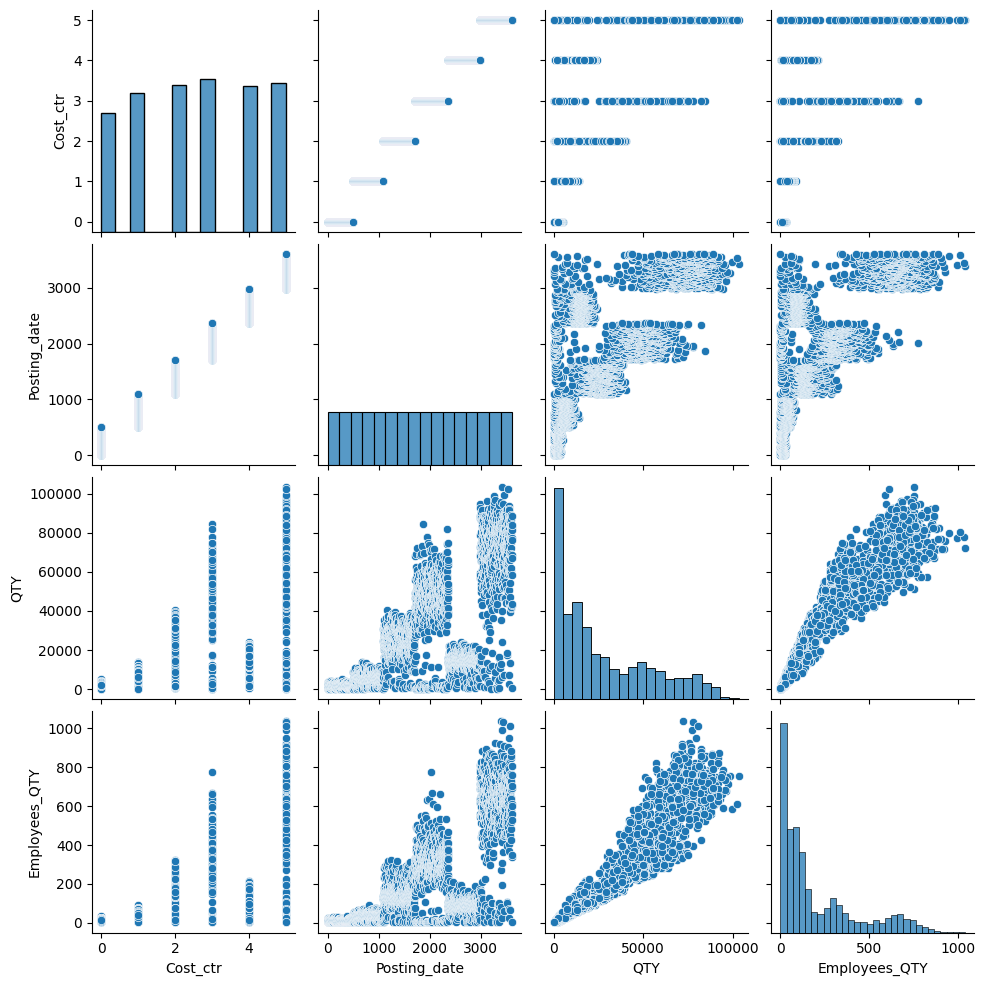

In [17]:
sns.pairplot(df);

### Análise da Normalidade

Gráfico QQ-Plot

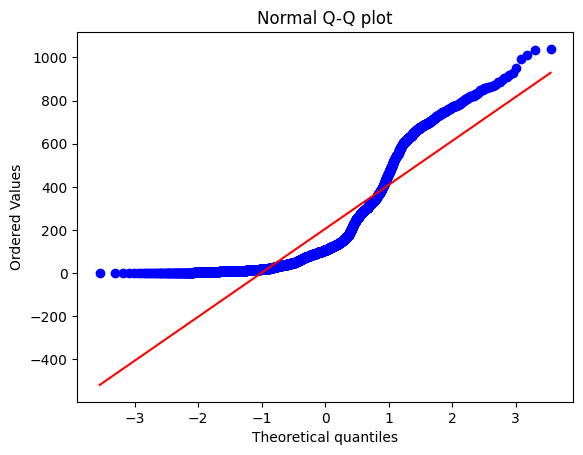

In [18]:
stats.probplot(df['Employees_QTY'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

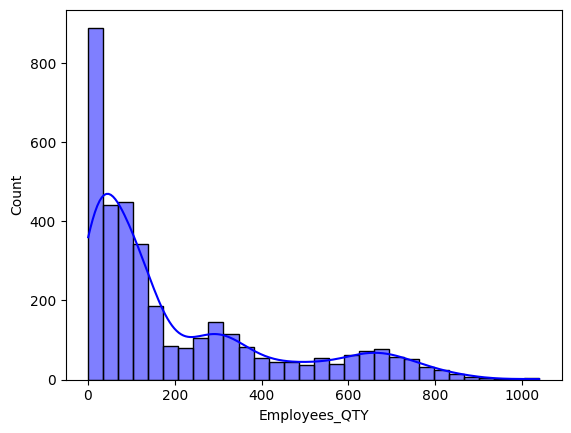

In [19]:
sns.histplot(df, x='Employees_QTY', bins=30, color="blue", kde=True, stat="count");

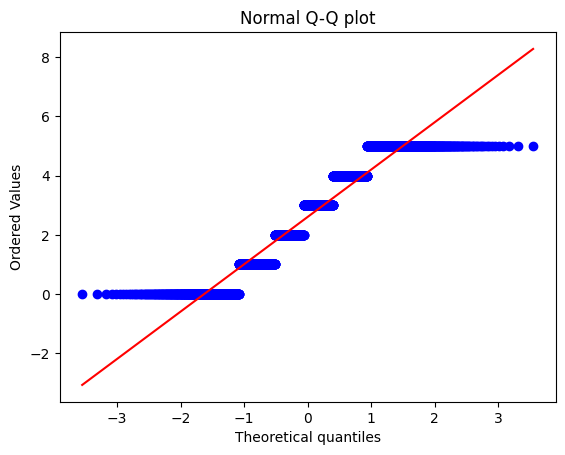

In [20]:
stats.probplot(df['Cost_ctr'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

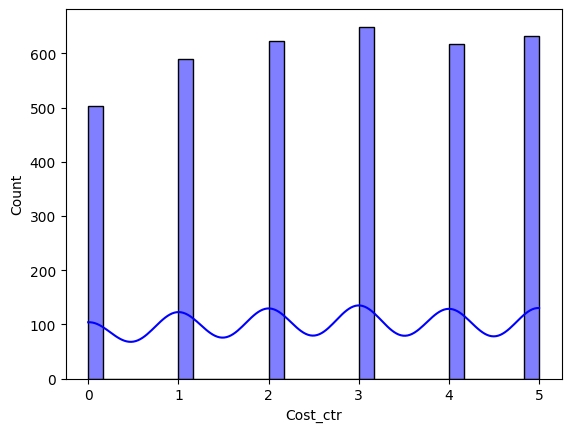

In [21]:
sns.histplot(df, x='Cost_ctr', bins=30, color="blue", kde=True, stat="count");

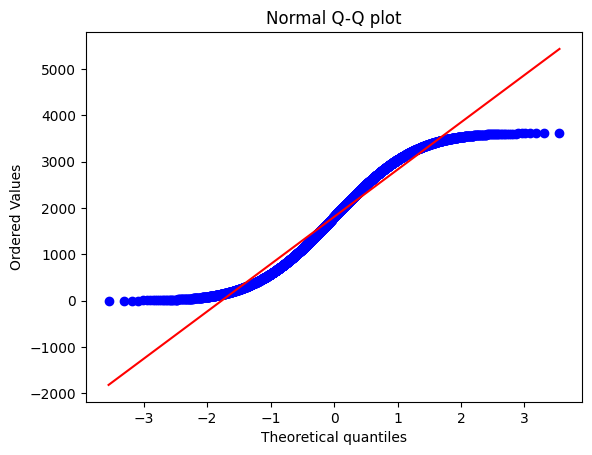

In [22]:
stats.probplot(df['Posting_date'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

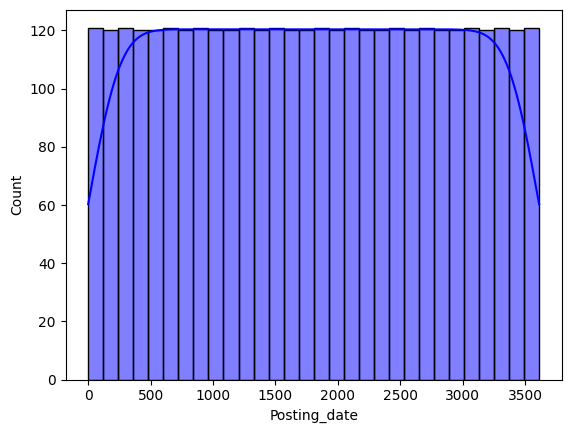

In [23]:
sns.histplot(df, x='Posting_date', bins=30, color="blue", kde=True, stat="count");

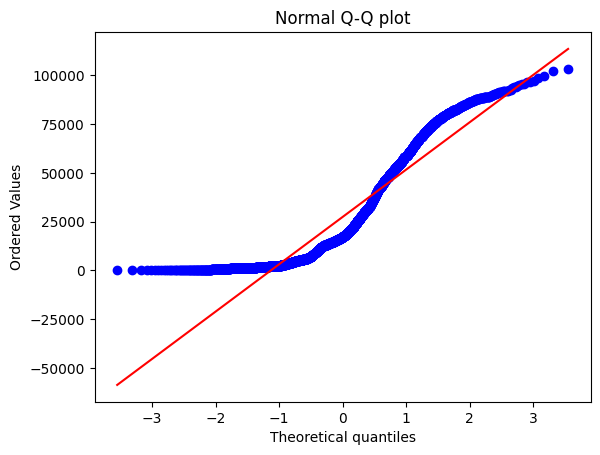

In [12]:
stats.probplot(df['QTY'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

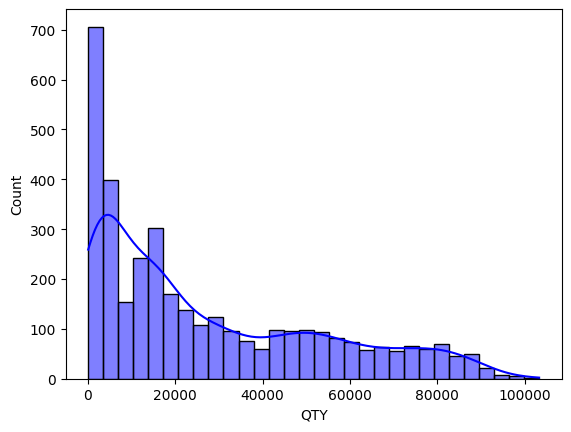

In [14]:
sns.histplot(df, x='QTY', bins=30, color="blue", kde=True, stat="count");

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [3]:
estatistica, p = stats.shapiro(df.Employees_QTY)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8067594170570374
p-valor: 0.0


In [4]:
estatistica, p = stats.shapiro(df.Cost_ctr)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9115084409713745
p-valor: 1.1161342268347168e-41


In [5]:
estatistica, p = stats.shapiro(df.Posting_date)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9548957943916321
p-valor: 4.815062310826956e-32


In [6]:
estatistica, p = stats.shapiro(df.QTY)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8716898560523987
p-valor: 0.0


**analisando os resultados dos testes estatísticos (p-valor) e os gráficos de histograma e distribuição normal, podemos concluir que todas as variáveis foram reprovadas no teste de normalidade**

**OBS: para DFs com mais de 5k registros (limitação do Shapiro-Wilk), podemos usar o seguinte teste:**

Teste Lilliefors (Kolmogorov_Sminorv)
Ho = distribuição normal : p > 0.05
Ha = distribuição != normal : p <= 0.05

### Análise da Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [7]:
# Spearman
correlacoes = df.corr(method='spearman')
correlacoes

,Cost_ctr,Posting_date,QTY,Employees_QTY
Cost_ctr,1.000000,0.985757,0.722642,0.737241
Posting_date,0.985757,1.000000,0.716881,0.730027
QTY,0.722642,0.716881,1.000000,0.980390
Employees_QTY,0.737241,0.730027,0.980390,1.000000


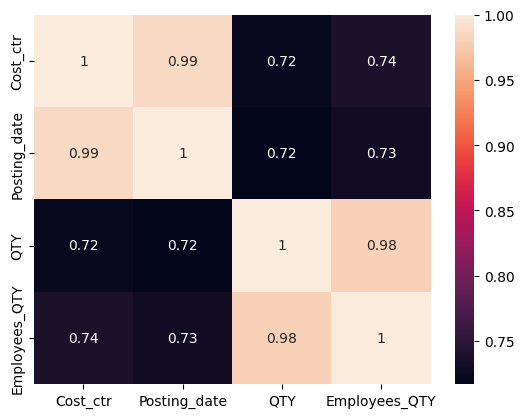

In [8]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR MÚLTIPLA**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [27]:
x1 = df.iloc[:,0:3].values
x1

array([[    0,     0,  1160],
       [    0,     1,  3330],
       [    0,     2,  1650],
       ...,
       [    5,  3610, 66944],
       [    5,  3611, 58424],
       [    5,  3612,   300]], dtype=int64)

In [28]:
y = df.iloc[:, 3].values
y

array([ 11,  13,  12, ..., 808, 528,   1], dtype=int64)

## **BASE DE TREINO E TESTE**

In [29]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [30]:
x_treino.shape, y_treino.shape

((2529, 3), (2529,))

In [31]:
x_teste.shape, y_teste.shape

((1084, 3), (1084,))

In [32]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [33]:
# Intercepto (coeficiente linear) e Coeficiente Angular
multipla.intercept_, multipla.coef_

(-40.07422015091427, array([2.65847154, 0.01381713, 0.00775085]))

In [34]:
print("Equação: Valor = {:.2f} + ({:.2f})*Cost_ctr + ({:.2f})*Posting_date + ({:.2f})*QTY".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

Equação: Valor = -40.07 + (2.66)*Cost_ctr + (0.01)*Posting_date + (0.01)*QTY


In [35]:
# Coeficiente de Determinação dados de treino
multipla.score(x_treino, y_treino)

0.9017139739923568

In [36]:
# Coeficiente de Determinação dados de teste
multipla.score(x_teste, y_teste)

0.9010406454849778

In [37]:
previsoes = multipla.predict(x_teste)
previsoes

array([  1.20897969, -21.27733353, 135.09674409, ..., 117.80045591,
       153.97846181,  25.67249885])

**Métricas de Desempenho**

In [38]:
# Erro médio quadrático
mean_squared_error(y_teste, previsoes)

5113.339454496367

In [39]:
# Raiz do erro médio quadrático 
np.sqrt(mean_squared_error(y_teste, previsoes))

71.50761815706329

### **Validação Cruzada**

In [40]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [42]:
# Criando o modelo
modelo = LinearRegression()
resultado = cross_val_score(modelo, x1, y, cv = kfold)
resultado

array([0.90138712, 0.90859323, 0.91953859, 0.8981494 , 0.88995471,
       0.91771362, 0.9203134 , 0.88263118, 0.90898206, 0.89201737,
       0.88607133, 0.90582532, 0.90450394, 0.8825567 , 0.90391811])

In [43]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 90.15%


**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,9017/0,901; RMSE = 71,50; R^2 Validação Cruzada: 90,15%

### **Avaliando a Regressão Linear Múltipla com Statsmodels**

In [44]:
# Criação do modelo
modelo = smf.ols('Employees_QTY ~ Cost_ctr + Posting_date + QTY', data = df).fit()

In [45]:
residuos = modelo.resid
residuos

0        42.052755
1        27.171176
2        39.215146
3        47.765741
4        34.429902
           ...    
3608    -14.119603
3609    -13.148732
3610    264.489828
3611     50.700226
3612    -24.523954
Length: 3613, dtype: float64

#### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [46]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.911116361618042
p-valor: 9.554052929766603e-42


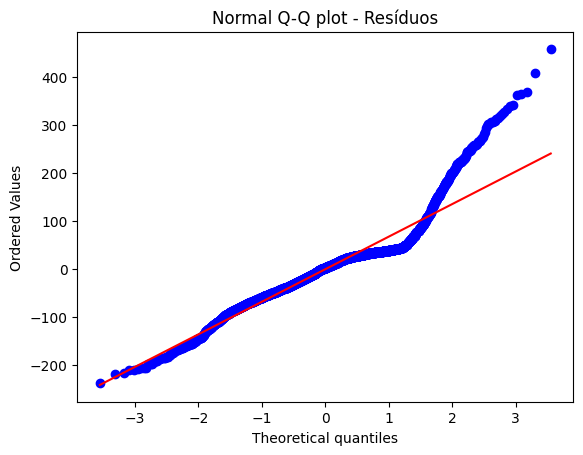

In [47]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

#### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

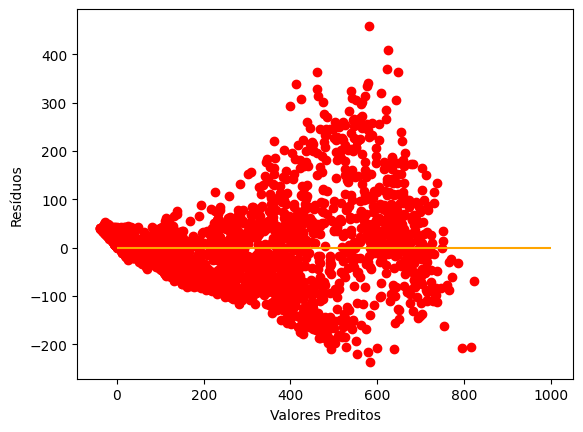

In [52]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [53]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo.resid, modelo.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 658.3319848170253
p-valor: 2.274293963857644e-142
f-valor: 268.0414089384038
f_p-valor: 4.696205109205941e-157


#### **Outliers nos resíduos**

(Entre -3 e 3)

In [54]:
outliers = modelo.outlier_test()

In [55]:
outliers.max()

student_resid    6.495347
unadj_p          0.999676
bonf(p)          1.000000
dtype: float64

In [56]:
outliers.min()

student_resid   -3.333591e+00
unadj_p          9.416733e-11
bonf(p)          3.402266e-07
dtype: float64

#### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [57]:
variaveis = df[['Cost_ctr','Posting_date','QTY']]

In [58]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,Cost_ctr,Posting_date,QTY
Cost_ctr,1.000000,0.985464,0.694730
Posting_date,0.985464,1.000000,0.689216
QTY,0.694730,0.689216,1.000000


#### **Análise do Modelo**

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [59]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          Employees_QTY   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:24:24   Log-Likelihood:                -20531.
No. Observations:                3613   AIC:                         4.107e+04
Df Residuals:                    3609   BIC:                         4.109e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -40.0693      2.581    -15.525   

### **Analisando o resultado de todos os testes feitos acima, temos que, apesar do modelo ter apresentado um bom resultado pelo erro médio quadrático, o modelo construido possui inconsistências!** ###